In [1]:
import pandas as pd
import numpy as np
import cv2

import os
import glob
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/CT_KIDNEY_DATASET/kidneyData.csv', index_col = 0)
df.head()

,image_id,path,diag,target,Class
0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


In [5]:
df.shape

(12446, 5)

In [7]:
df.describe()

,target
count,12446.000000
mean,1.179495
std,1.053682
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [9]:
df.Class.value_counts()

Class
Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

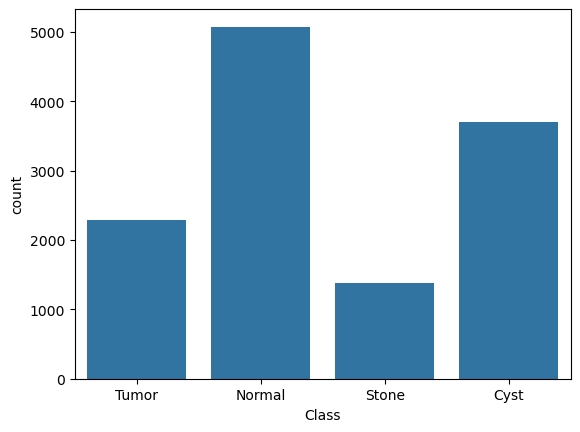

In [11]:
sns.countplot(df, x = 'Class')

In [101]:
# Кол-во изображений в каждой из папок
main_path = 'D:/CT_KIDNEY_DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

for folder in os.listdir(main_path):
    folder_classes = os.listdir(os.path.join(main_path, folder))
    print(f'Folder Name: {folder}\n')
    print(f'Number of elements: {len(folder_classes)}\n')
    print(f'First image name: {folder_classes[0]}\n')
    print('----------------------------------------')

Folder Name: Cyst

Number of elements: 3709

First image name: Cyst- (1).jpg

----------------------------------------
Folder Name: Normal

Number of elements: 5077

First image name: Normal- (1).jpg

----------------------------------------
Folder Name: Stone

Number of elements: 1377

First image name: Stone- (1).jpg

----------------------------------------
Folder Name: Tumor

Number of elements: 2283

First image name: Tumor- (1).jpg

----------------------------------------


### Структура папок

In [20]:
def tree(path='.', head='', tail=''):
    path = Path(path)

    if path.is_dir():
        print(head + path.name)
        entries = sorted(filter(Path.is_dir, path.iterdir()))

        for i, entry in enumerate(entries):
            if i < len(entries) - 1:
                tree(entry, tail + '├──', tail + '│  ')
            else:
                tree(entry, tail + '└──', tail + '   ')

tree(main_path)

CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone
├──Cyst
├──Normal
├──Stone
└──Tumor


### Визуализация изображений из каждой папки 

In [36]:
path_normal = 'D:/CT_KIDNEY_DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/'
path_stone = 'D:/CT_KIDNEY_DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/'
path_cyst = 'D:/CT_KIDNEY_DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/'
path_tumor = 'D:/CT_KIDNEY_DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/'

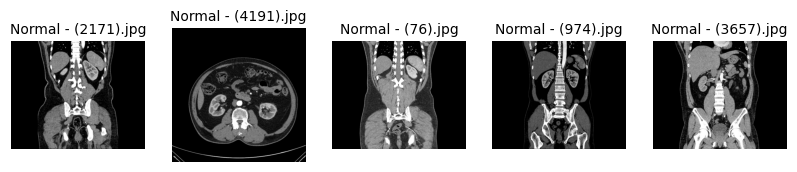

In [38]:
fig = plt.subplots(1, 5, figsize = (10,10))

classes = os.listdir(path_normal)

for i in np.arange(0, 5):
    index = np.random.randint(0, 5000)
    plt.subplot(1, 5, i+1)
    img = plt.imread(path_normal + classes[index])
    plt.imshow(img, cmap = 'gray')
    plt.title(f'Normal - ({index}).jpg', fontsize = 10)
    plt.axis('off')
plt.show()

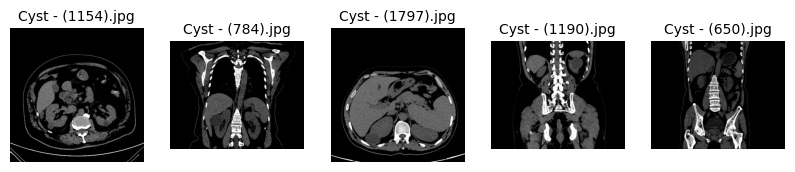

In [39]:
fig = plt.subplots(1, 5, figsize = (10,10))

classes = os.listdir(path_cyst)

for i in np.arange(0, 5):
    index = np.random.randint(0, 3000)
    plt.subplot(1, 5, i+1)
    img = plt.imread(path_cyst + classes[index])
    plt.imshow(img, cmap = 'gray')
    plt.title(f'Cyst - ({index}).jpg', fontsize = 10)
    plt.axis('off')
plt.show()

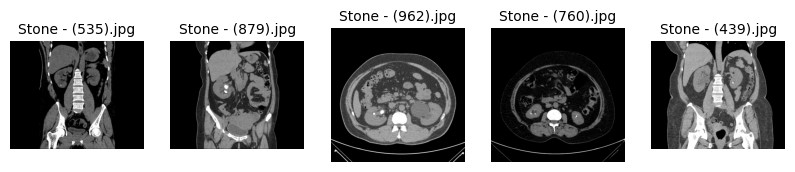

In [41]:
fig = plt.subplots(1, 5, figsize = (10,10))

classes = os.listdir(path_stone)

for i in np.arange(0, 5):
    index = np.random.randint(0, 1000)
    plt.subplot(1, 5, i+1)
    img = plt.imread(path_stone + classes[index])
    plt.imshow(img, cmap = 'gray')
    plt.title(f'Stone - ({index}).jpg', fontsize = 10)
    plt.axis('off')
plt.show()

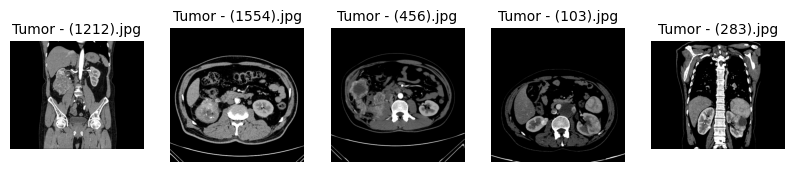

In [44]:
fig = plt.subplots(1, 5, figsize = (10,10))

classes = os.listdir(path_tumor)

for i in np.arange(0, 5):
    index = np.random.randint(0, 2000)
    plt.subplot(1, 5, i+1)
    img = plt.imread(path_tumor + classes[index])
    plt.imshow(img, cmap = 'gray')
    plt.title(f'Tumor - ({index}).jpg', fontsize = 10)
    plt.axis('off')
plt.show()

### Проверка размеров изображений

In [32]:
sizes_normal = []
sizes_cyst = []
sizes_tumor = []
sizes_stone = []

for i in [path_normal, path_cyst, path_tumor, path_stone]:
    classes = os.listdir(i)

    for j in classes:
        img = cv2.imread(i + j, cv2.IMREAD_COLOR)
        #print(img.shape)
        if i == path_cyst:
            sizes_cyst.append(img.shape)
        elif i == path_tumor:
            sizes_tumor.append(img.shape)
        elif i == path_stone:
            sizes_stone.append(img.shape)
        else:
            sizes_normal.append(img.shape)

In [33]:
for i in [sizes_normal, sizes_cyst, sizes_stone, sizes_tumor]:
    print('Sizes: ')
    print({x: i.count(x) for x in i})
    print('-----------------------------------------------')

Sizes: 
{(512, 512, 3): 3274, (634, 785, 3): 74, (654, 808, 3): 72, (602, 745, 3): 102, (702, 869, 3): 54, (651, 804, 3): 150, (680, 840, 3): 171, (858, 1060, 3): 65, (640, 791, 3): 81, (670, 828, 3): 93, (619, 764, 3): 39, (691, 854, 3): 111, (614, 758, 3): 64, (667, 824, 3): 85, (636, 787, 3): 69, (640, 790, 3): 58, (591, 730, 3): 77, (630, 778, 3): 67, (722, 892, 3): 61, (658, 813, 3): 93, (604, 746, 3): 66, (644, 796, 3): 54, (611, 755, 3): 97}
-----------------------------------------------
Sizes: 
{(569, 705, 3): 140, (512, 512, 3): 2247, (700, 865, 3): 16, (528, 652, 3): 12, (646, 798, 3): 240, (566, 701, 3): 126, (654, 808, 3): 12, (550, 680, 3): 74, (545, 675, 3): 88, (932, 1152, 3): 70, (1001, 1236, 3): 37, (811, 1003, 3): 95, (670, 828, 3): 9, (544, 672, 3): 74, (765, 947, 3): 28, (631, 781, 3): 69, (629, 779, 3): 13, (678, 838, 3): 6, (651, 804, 3): 23, (988, 1221, 3): 86, (451, 559, 3): 22, (597, 739, 3): 14, (943, 1167, 3): 26, (534, 660, 3): 13, (684, 847, 3): 26, (504, 

### Изменение размера изображений

In [119]:
def resizing(img, folder, file_name):  
    dim = (512, 512)

    img_resize = cv2.resize(img, dsize = dim)
    cv2.imwrite(f'D:\\CT_KIDNEY_DATASET\\RESIZED_DATASET\\{folder}\\{file_name}', img_resize)
    return img_resize

In [126]:
for image in glob.glob(path_cyst + '*.jpg'):
    name = image.split('\\')[1]
    
    photo = cv2.imread(image, cv2.IMREAD_COLOR)
    photo = resizing(photo, 'Cyst', name)

In [128]:
for image in glob.glob(path_normal + '*.jpg'):
    name = image.split('\\')[1]
    
    photo = cv2.imread(image, cv2.IMREAD_COLOR)
    photo = resizing(photo, 'Normal', name)

In [130]:
for image in glob.glob(path_stone + '*.jpg'):
    name = image.split('\\')[1]
    
    photo = cv2.imread(image, cv2.IMREAD_COLOR)
    photo = resizing(photo, 'Stone', name)

In [132]:
for image in glob.glob(path_tumor + '*.jpg'):
    name = image.split('\\')[1]
    
    photo = cv2.imread(image, cv2.IMREAD_COLOR)
    photo = resizing(photo, 'Tumor', name)

In [134]:
# Проверка, что все изображения сохранены в изначальном кол-ве
resized_data_path = 'D:\\CT_KIDNEY_DATASET\\RESIZED_DATASET'

for folder in os.listdir(resized_data_path):
    folder_classes = os.listdir(os.path.join(resized_data_path, folder))
    print(f'Folder Name: {folder}\n')
    print(f'Number of resized elements: {len(folder_classes)}\n')
    print(f'First resized image name: {folder_classes[0]}\n')
    print('----------------------------------------')

Folder Name: Cyst

Number of resized elements: 3709

First resized image name: Cyst- (1).jpg

----------------------------------------
Folder Name: Normal

Number of resized elements: 5077

First resized image name: Normal- (1).jpg

----------------------------------------
Folder Name: Stone

Number of resized elements: 1377

First resized image name: Stone- (1).jpg

----------------------------------------
Folder Name: Tumor

Number of resized elements: 2283

First resized image name: Tumor- (1).jpg

----------------------------------------


In [103]:
path_resized_normal = 'D:\\CT_KIDNEY_DATASET\\RESIZED_DATASET/Normal/'
path_resized_stone = 'D:\\CT_KIDNEY_DATASET\\RESIZED_DATASET/Stone/'
path_resized_cyst = 'D:\\CT_KIDNEY_DATASET\\RESIZED_DATASET/Cyst/'
path_resized_tumor = 'D:\\CT_KIDNEY_DATASET\\RESIZED_DATASET/Tumor/'

### Очистка папок с исправлеными изображениями

In [117]:
for i in [path_resized_normal, path_resized_stone, path_resized_cyst, path_resized_tumor]:
    num_files = len(os.listdir(i))
    print(f"В папке {i} находится {num_files} файлов")
    if len(os.listdir(i)) != 0:
        for file in os.listdir(i):
            file_path = os.path.join(i, file)
            if os.path.isfile(file_path):
                os.remove(file_path)
        print(f"Папка {i} очищена")

В папке D:\CT_KIDNEY_DATASET\RESIZED_DATASET/Normal/ находится 5077 файлов
Папка D:\CT_KIDNEY_DATASET\RESIZED_DATASET/Normal/ очищена
В папке D:\CT_KIDNEY_DATASET\RESIZED_DATASET/Stone/ находится 1377 файлов
Папка D:\CT_KIDNEY_DATASET\RESIZED_DATASET/Stone/ очищена
В папке D:\CT_KIDNEY_DATASET\RESIZED_DATASET/Cyst/ находится 3709 файлов
Папка D:\CT_KIDNEY_DATASET\RESIZED_DATASET/Cyst/ очищена
В папке D:\CT_KIDNEY_DATASET\RESIZED_DATASET/Tumor/ находится 2283 файлов
Папка D:\CT_KIDNEY_DATASET\RESIZED_DATASET/Tumor/ очищена
